In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=2bbfff50ef6443e9480c016e2256842bb5f3ccab06523e5432e1a86be60826be
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!pip install eng_to_ipa
import eng_to_ipa 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eng_to_ipa: filename=eng_to_ipa-0.0.2-py3-none-any.whl size=2822631 sha256=1a7caa5e53cd3a8a86e60a8e8c4d33e51761fd2100813493b751ba8aa11e210e
  Stored in directory: /root/.cache/pip/wheels/5b/ab/07/fe6722f710d8ef8bd0ccb4eb689ef96f5552f3fc0c80c1aa9c
Successfully built eng_to_ipa


In [ ]:
print("computer science")
print(eng_to_ipa.convert("computer science"))

computer science
kəmˈpjutər saɪəns


In [ ]:
import re


In [196]:
!wget -q -O all_words.txt "https://drive.google.com/uc?export=download&id=1jWIsp1Ymw4yq7HbOLAJbQAnZnP2UH7Wu" # from Ed
all_words = []
with open('all_words.txt') as f:
  for line in f:
    for word in line.split():
      all_words.append(word)

In [ ]:
!wget -q -O all_ipas.txt "https://drive.google.com/uc?export=download&id=1oovuZsQ98e7Yz56zv8buJDC1zjQVqXLS" # from Ed
all_ipas = []
with open('all_ipas.txt') as f:
  for line in f:
    for word in line.split():
      all_ipas.append(word)

In [197]:
print(all_words[-10:])
print(all_ipas[-10:])
print(all_words[:10])
print(all_ipas[:10])
print(all_words[600000:600010])
print(all_ipas[600000:600010])

['没', '有', '先', '叫', '先', '叫', 'melissa', '来', '大', '姐']
['muo', 'jou', 'ɕian', 't͡ɕiao', 'ɕian', 't͡ɕiao', 'məˈlɪsə', 'lai', 'tai', 't͡ɕie']
['then', 'area', 'five', '的', 'total', '是', '不', '懂', 'but', 'official']
['ðɛn', 'ˈɛriə', 'faɪv', 'ti', 'ˈtoʊtəl', 'ʂɻ̩', 'pu', 'toŋ', 'bət', 'əˈfɪʃəl']
['other', 'salon', 'and', 'say', 'help', 'me', 'save', 'my', 'hair', 'and']
['ˈəðər', 'səˈlɑn', 'ənd', 'seɪ', 'hɛlp', 'mi', 'seɪv', 'maɪ', 'hɛr', 'ənd']


In [ ]:
languages = []
first_ipa = []
last_ipa = []
first_syllable = []
last_syllable = []
for idx, word in enumerate(all_words):
  if re.search("[\u4e00-\u9FFF]", word): # cn
    languages.append(0)
    zh_ipa = all_ipas[idx]
    first_ipa.append(zh_ipa[0])
    last_ipa.append(zh_ipa[-1])
    first_syllable.append(zh_ipa)
    last_syllable.append(zh_ipa)
  else: # en
    languages.append(1)
    en_ipa = all_ipas[idx]
    if en_ipa[0] == 'ˈ' or en_ipa[0] == 'ˌ':
      en_ipa = en_ipa[1:]
    first_ipa.append(en_ipa[0])
    last_ipa.append(en_ipa[-1])
    syllables = re.split('ˈ|ˌ', en_ipa)
    first_syllable.append(syllables[0])
    last_syllable.append(syllables[-1])
      

In [ ]:
print(first_ipa[600000:600010])
print(last_ipa[600000:600010])
print(first_syllable[600000:600010])
print(last_syllable[600000:600010])
print(all_words[600000:600010])
print(all_ipas[600000:600010])

['ə', 's', 'ə', 's', 'h', 'm', 's', 'm', 'h', 'ə']
['r', 'n', 'd', 'ɪ', 'p', 'i', 'v', 'ɪ', 'r', 'd']
['əðər', 'sə', 'ənd', 'seɪ', 'hɛlp', 'mi', 'seɪv', 'maɪ', 'hɛr', 'ənd']
['əðər', 'lɑn', 'ənd', 'seɪ', 'hɛlp', 'mi', 'seɪv', 'maɪ', 'hɛr', 'ənd']
['other', 'salon', 'and', 'say', 'help', 'me', 'save', 'my', 'hair', 'and']
['ˈəðər', 'səˈlɑn', 'ənd', 'seɪ', 'hɛlp', 'mi', 'seɪv', 'maɪ', 'hɛr', 'ənd']


In [ ]:
is_cs = [0]
for i in range(1, len(languages)):
  if languages[i] != languages[i-1]:
    is_cs.append(1)
  else:
    is_cs.append(0)

In [ ]:
print(is_cs[:10])
print(languages[:10])

[0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1]


In [ ]:
from collections import Counter

In [ ]:
languages_counter = Counter(languages)
first_ipa_counter = Counter(first_ipa)
last_ipa_counter = Counter(last_ipa)
first_syllable_counter = Counter(first_syllable)
last_syllable_counter = Counter(last_syllable)
all_ipas_counter = Counter(all_ipas)
all_words_counter = Counter(all_words)

In [ ]:
first_syllable_counter.most_common(10)

[('ʂɻ̩', 23421),
 ('wo', 19939),
 ('ti', 17239),
 ('i', 13319),
 ('tʰa', 13224),
 ('jou', 12475),
 ('ni', 11184),
 ('ke', 10532),
 ('t͡ɕiou', 10218),
 ('ðɛn', 10057)]

In [198]:
first_ipa_cs = {}
first_syllable_cs = {}
last_ipa_cs = {}
last_syllable_cs = {}
all_ipas_cs = {}
all_words_cs = {}
for idx, item in enumerate(is_cs, start=1):
  if item == 1:
    corresponding_first_ipa = first_ipa[idx]
    first_ipa_cs[corresponding_first_ipa] = first_ipa_cs.get(corresponding_first_ipa, 0) + 1
    corresponding_first_syllable = first_syllable[idx]
    first_syllable_cs[corresponding_first_syllable] = first_syllable_cs.get(corresponding_first_syllable, 0) + 1
    previous_last_ipa = last_ipa[idx-1]
    last_ipa_cs[previous_last_ipa] = last_ipa_cs.get(previous_last_ipa, 0) + 1
    previous_last_syllable = last_syllable[idx-1]
    last_syllable_cs[previous_last_syllable] = last_syllable_cs.get(previous_last_syllable, 0) + 1

    corresponding_ipa = all_ipas[idx]
    all_ipas_cs[corresponding_ipa] = all_ipas_cs.get(corresponding_ipa, 0) + 1
    corresponding_word = all_words[idx]
    all_words_cs[corresponding_word] = all_words_cs.get(corresponding_word, 0) + 1

In [ ]:
all_ipas_frequencies = Counter({k: all_ipas_cs[k]/all_ipas_counter[k] for k in all_ipas_cs.keys() & all_ipas_counter if all_ipas_counter[k] > 50})
all_ipas_frequencies.most_common(30)

[('saɪəns', 0.5384615384615384),
 ('vi', 0.4573170731707317),
 ('ˈwəndər', 0.4444444444444444),
 ('ˈsɛntər', 0.3968253968253968),
 ('ˈlɛvəl', 0.38144329896907214),
 ('men', 0.37824908308084837),
 ('pɔɪnt', 0.3745583038869258),
 ('fɑr', 0.3728813559322034),
 ('trɪp', 0.37037037037037035),
 ('ˈfɪfˈtin', 0.36538461538461536),
 ('kɑm', 0.35526315789473684),
 ('ɪksˈʧeɪnʤ', 0.3448275862068966),
 ('ˈmɪnət', 0.32727272727272727),
 ('klæs', 0.32386363636363635),
 ('praɪs', 0.3235294117647059),
 ('dɪˈpɛndz', 0.3225806451612903),
 ('əp', 0.30828220858895705),
 ('ˈdɔlər', 0.3076923076923077),
 ('keɪ', 0.304635761589404),
 ('hə', 0.30357142857142855),
 ('ɪgˈzæm', 0.3013698630136986),
 ('t͡ɕʰie', 0.3006535947712418),
 ('lɔr', 0.29651162790697677),
 ('t͡ɕʰiaŋ', 0.2949640287769784),
 ('wei', 0.2919395465994962),
 ('hor', 0.2918287937743191),
 ('ˈstɔri', 0.2898550724637681),
 ('ˈmɑʤulz', 0.28846153846153844),
 ('ˈɔnti', 0.288135593220339),
 ('saʊnd', 0.2876712328767123)]

In [ ]:
all_words_frequencies = Counter({k: all_words_cs[k]/all_words_counter[k] for k in all_words_cs.keys() & all_words_counter if all_words_counter[k] > 50})
all_words_frequencies.most_common(30)

[('凯', 0.647887323943662),
 ('y', 0.5698924731182796),
 ('science', 0.5384615384615384),
 ('者', 0.47619047619047616),
 ('粉', 0.4626865671641791),
 ('wonder', 0.4444444444444444),
 ('T', 0.4125),
 ('K', 0.4063926940639269),
 ('v', 0.4),
 ('centre', 0.3968253968253968),
 ('们', 0.38225311136253437),
 ('level', 0.38144329896907214),
 ('com', 0.38),
 ('I', 0.3783783783783784),
 ('强', 0.37662337662337664),
 ('C', 0.3755868544600939),
 ('point', 0.3745583038869258),
 ('far', 0.3728813559322034),
 ('果', 0.3717171717171717),
 ('嘛', 0.37037037037037035),
 ('trip', 0.37037037037037035),
 ('fifteen', 0.36538461538461536),
 ('呀', 0.3629032258064516),
 ('exchange', 0.3448275862068966),
 ('B', 0.3392857142857143),
 ('minute', 0.32727272727272727),
 ('后', 0.32434402332361517),
 ('class', 0.32386363636363635),
 ('price', 0.3235294117647059),
 ('depends', 0.3225806451612903)]

In [ ]:
first_ipa_frequencies = Counter({k: first_ipa_cs[k]/first_ipa_counter[k] for k in first_ipa_cs.keys() & first_ipa_counter if first_ipa_counter[k] > 50})
first_ipa_frequencies.most_common(30)


[('θ', 0.20696962561808335),
 ('m', 0.2035027365129007),
 ('ʂ', 0.20151378376501633),
 ('i', 0.18531430439045649),
 ('x', 0.18100531657805705),
 ('e', 0.1756198347107438),
 ('k', 0.17349667451374762),
 ('t', 0.17261865084655378),
 ('c', 0.17142857142857143),
 ('n', 0.1707092980521867),
 ('ɑ', 0.17015926236378875),
 ('j', 0.1691518398706025),
 ('w', 0.16790462663282651),
 ('p', 0.1677070328755722),
 ('ɛ', 0.164251944486808),
 ('æ', 0.16193116193116194),
 ('ʈ', 0.16120051227796647),
 ('l', 0.15942460739668893),
 ('ɻ', 0.15816618911174785),
 ('o', 0.15619014452376806),
 ('s', 0.1552964942552923),
 ('a', 0.15280231251003693),
 ('ʤ', 0.15067290813341136),
 ('b', 0.14757029091500082),
 ('y', 0.14754098360655737),
 ('r', 0.14362289137632037),
 ('ʃ', 0.14146090534979425),
 ('ɕ', 0.14098972922502334),
 ('f', 0.13836477987421383),
 ('ð', 0.13810720613077335)]

In [ ]:
first_syllable_frequencies = Counter({k: first_syllable_cs[k]/first_syllable_counter[k] for k in first_syllable_cs.keys() & first_syllable_counter if first_syllable_counter[k] > 50})
first_syllable_frequencies.most_common(30)


[('saɪəns', 0.5384615384615384),
 ('vi', 0.4491017964071856),
 ('wəndər', 0.4444444444444444),
 ('sɛntər', 0.3968253968253968),
 ('lɛvəl', 0.38144329896907214),
 ('men', 0.37824908308084837),
 ('pɔɪnt', 0.3745583038869258),
 ('fɑr', 0.3728813559322034),
 ('trɪp', 0.37037037037037035),
 ('fɪf', 0.36538461538461536),
 ('kɑm', 0.35064935064935066),
 ('ɪks', 0.3448275862068966),
 ('mɪnət', 0.32727272727272727),
 ('praɪs', 0.3235294117647059),
 ('klæs', 0.32275132275132273),
 ('dɔlər', 0.3076923076923077),
 ('keɪ', 0.304635761589404),
 ('t͡ɕʰie', 0.3006535947712418),
 ('əp', 0.296987087517934),
 ('lɔr', 0.29651162790697677),
 ('t͡ɕʰiaŋ', 0.2949640287769784),
 ('wei', 0.2919395465994962),
 ('hor', 0.2918287937743191),
 ('mɑʤulz', 0.28846153846153844),
 ('ɔnti', 0.288135593220339),
 ('saʊnd', 0.2876712328767123),
 ('mɪd', 0.2830188679245283),
 ('luo', 0.2826086956521739),
 ('ʧɪkən', 0.28125),
 ('strɛs', 0.2777777777777778)]

In [ ]:
last_ipa_frequencies = Counter({k: last_ipa_cs[k]/last_ipa_counter[k] for k in last_ipa_cs.keys() & last_ipa_counter if last_ipa_counter[k] > 50})
last_ipa_frequencies.most_common(30)


[('ɛ', 0.5216049382716049),
 ('c', 0.5070422535211268),
 ('h', 0.4361413043478261),
 ('b', 0.41368078175895767),
 ('g', 0.33597285067873306),
 ('ʤ', 0.33560709413369716),
 ('ʃ', 0.3134087237479806),
 ('a', 0.2638072178023752),
 ('p', 0.24203821656050956),
 ('k', 0.24191235059760957),
 ('l', 0.23934740882917466),
 ('ʧ', 0.2377142857142857),
 ('ɑ', 0.2372745490981964),
 ('s', 0.2301762114537445),
 ('r', 0.21460027977824983),
 ('f', 0.20246800731261427),
 ('t', 0.20116517251469768),
 ('o', 0.20082824760244114),
 ('ʊ', 0.19427928651775672),
 ('d', 0.18690694521967946),
 ('m', 0.18578465869106264),
 ('æ', 0.1855820750121773),
 ('ɪ', 0.17150728963379636),
 ('n', 0.16987755697002088),
 ('i', 0.15500809370509813),
 ('z', 0.14623655913978495),
 ('θ', 0.1411192214111922),
 ('u', 0.12337387625594923),
 ('ə', 0.11519167061050639),
 ('v', 0.1078838174273859)]

In [ ]:
last_syllable_frequencies = Counter({k: last_syllable_cs[k]/last_syllable_counter[k] for k in last_syllable_cs.keys() & last_syllable_counter if last_syllable_counter[k] > 50})
last_syllable_frequencies.most_common(30)

[('slɑt', 0.7407407407407407),
 ('roomie', 0.7272727272727273),
 ('ɔnti', 0.711864406779661),
 ('drɑmə', 0.6911764705882353),
 ('stændərd', 0.6785714285714286),
 ('loʊd', 0.6779661016949152),
 ('sɛnd', 0.6724137931034483),
 ('leɪʒə', 0.6666666666666666),
 ('mɛsɪʤ', 0.648936170212766),
 ('lɛkʧər', 0.6375),
 ('lɛktɪv', 0.6363636363636364),
 ('slæk', 0.635593220338983),
 ('ʤɔɪn', 0.632183908045977),
 ('vɪdioʊ', 0.6153846153846154),
 ('næt', 0.6056338028169014),
 ('kɔr', 0.5975609756097561),
 ('prɑʤɛkt', 0.5968992248062015),
 ('teɪk', 0.590625),
 ('læks', 0.5901639344262295),
 ('drɔp', 0.5862068965517241),
 ('meh', 0.5818181818181818),
 ('bɪznɪs', 0.5804195804195804),
 ('bʊk', 0.5769230769230769),
 ('nɛt', 0.5714285714285714),
 ('pɑli', 0.5714285714285714),
 ('feɪl', 0.5714285714285714),
 ('læb', 0.5694444444444444),
 ('lɛ', 0.5625),
 ('zaɪn', 0.5571428571428572),
 ('lɔr', 0.5523255813953488)]

In [ ]:
from scipy.special import kl_div

def kl_divergence(dist1, dist2):
  min_len = min(len(dist1), len(dist2))
  return sum(kl_div(dist1[:min_len], dist2[:min_len]))


In [ ]:
def normalize(dist):
  return [float(i)/sum(dist) for i in dist]

In [ ]:
zipfian_dist = normalize([1/n for n in range(1, 51)])
print(zipfian_dist)

[0.22226147170498, 0.11113073585249, 0.07408715723499333, 0.055565367926245, 0.044452294340996, 0.037043578617496666, 0.03175163881499714, 0.0277826839631225, 0.02469571907833111, 0.022226147170498, 0.020205588336816363, 0.018521789308748333, 0.017097036284998462, 0.01587581940749857, 0.014817431446998666, 0.01389134198156125, 0.01307420421794, 0.012347859539165555, 0.011697972194998947, 0.011113073585249, 0.010583879604999047, 0.010102794168408182, 0.009663542248042608, 0.009260894654374166, 0.0088904588681992, 0.008548518142499231, 0.008231906359443703, 0.007937909703749284, 0.007664188679482068, 0.007408715723499333, 0.007169724893709032, 0.006945670990780625, 0.006735196112272121, 0.00653710210897, 0.006350327762999429, 0.006173929769582778, 0.006007066802837298, 0.005848986097499473, 0.005699012094999486, 0.0055565367926245, 0.005421011504999513, 0.005291939802499523, 0.005168871434999535, 0.005051397084204091, 0.004939143815666222, 0.004831771124021304, 0.0047289674830846805, 0.0

In [ ]:
P = [.05, .1, .2, .05, .15, .25, .08, .12]
Q = [.3, .1, .2, .1, .1, .02, .08, .1]
kl_divergence(P, Q)

0.5898851816191631

In [ ]:
!pip install -U functionwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from functionwords import FunctionWords

In [ ]:
fw_en = FunctionWords(function_words_list='english')
fw_cn = FunctionWords(function_words_list='chinese_simplified_modern')

In [ ]:
en_function_words = fw_en.get_feature_names()
cn_function_words = fw_cn.get_feature_names()

In [ ]:
cn_total = 0
en_total = 0
for word in all_words_counter.keys():
  if word in en_function_words:
    en_total += all_words_counter[word]
  elif word in cn_function_words:
    cn_total += all_words_counter[word]
print(cn_total)
print(en_total)

179753
148136


In [ ]:
words_languages = {all_words[i]: languages[i] for i in range(len(all_words))}

In [ ]:
en_function_word_counter = Counter({k: all_words_counter[k] for k in all_words_counter.keys() if k in en_function_words}).most_common()
cn_function_word_counter = Counter({k: all_words_counter[k] for k in all_words_counter.keys() if k in cn_function_words}).most_common()

In [ ]:
len(cn_function_words)

819

In [ ]:
len(cn_function_word_counter)

236

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# plot histograms of function words

<Axes: title={'center': 'English Function Words'}, xlabel='word'>

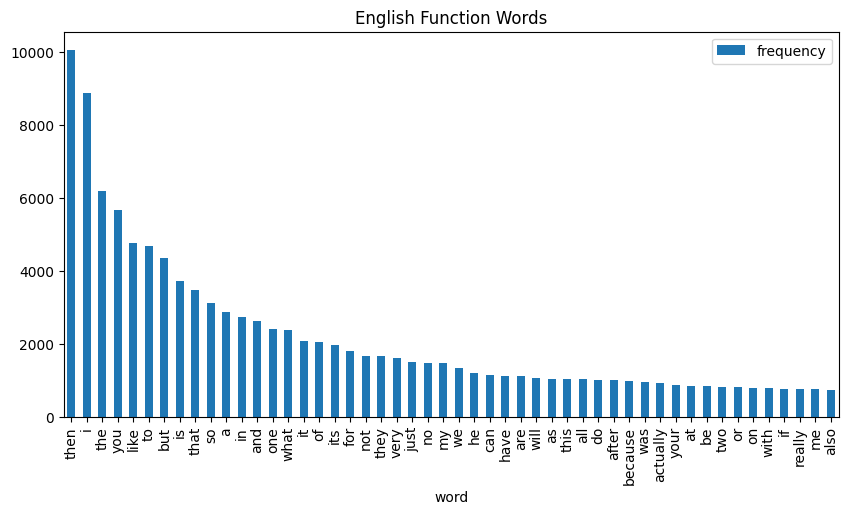

In [ ]:
df_en_function = pd.DataFrame(en_function_word_counter, columns=['word', 'frequency']).head(50)
df_en_function.plot(kind='bar', x='word', figsize=(10, 5), title="English Function Words")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
#plt.rc('font', family='Taipei Sans TC Beta')

--2023-05-01 10:15:47--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.126.139, 108.177.126.138, 108.177.126.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b63rmi2lqj7i0t1dhhe11256ntet5ioq/1682936100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=22274938-bcca-4e9e-8926-699f89c43aa9 [following]
--2023-05-01 10:15:47--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b63rmi2lqj7i0t1dhhe11256ntet5ioq/1682936100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=22274938-bcca-4e9e-8926-699f89c43aa9
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to d

In [ ]:
# res = sorted(cn_function_word_counter + en_function_word_counter, key = lambda ele: freq_map[ele[1]], reverse = True)

<Axes: title={'center': 'Chinese Function Words'}, xlabel='word'>

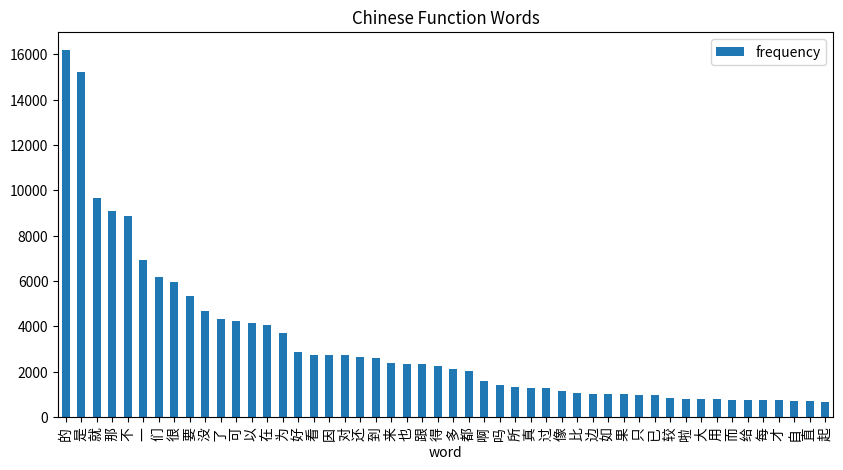

In [ ]:
df_cn_function = pd.DataFrame(cn_function_word_counter, columns=['word', 'frequency']).head(50)
df_cn_function.plot(kind='bar', x='word', figsize=(10, 5), title="Chinese Function Words")

In [ ]:
combined_function_word_counter = Counter({k: all_words_counter[k] for k in all_words_counter.keys() if (k in en_function_words or k in cn_function_words) and all_words_counter[k] > 50}).most_common()

In [ ]:
combined_function_word_counter

[('的', 16179),
 ('是', 15234),
 ('then', 10057),
 ('就', 9660),
 ('那', 9066),
 ('不', 8881),
 ('i', 8873),
 ('一', 6905),
 ('the', 6202),
 ('们', 6187),
 ('很', 5965),
 ('you', 5662),
 ('要', 5311),
 ('like', 4764),
 ('没', 4689),
 ('to', 4683),
 ('but', 4351),
 ('了', 4309),
 ('可', 4242),
 ('以', 4134),
 ('在', 4074),
 ('is', 3724),
 ('为', 3720),
 ('that', 3463),
 ('so', 3115),
 ('a', 2885),
 ('好', 2876),
 ('in', 2728),
 ('看', 2718),
 ('因', 2718),
 ('对', 2709),
 ('还', 2651),
 ('and', 2625),
 ('到', 2587),
 ('one', 2402),
 ('来', 2397),
 ('what', 2370),
 ('也', 2353),
 ('跟', 2327),
 ('得', 2251),
 ('多', 2113),
 ('it', 2079),
 ('of', 2042),
 ('都', 2009),
 ('its', 1977),
 ('for', 1793),
 ('not', 1669),
 ('they', 1659),
 ('very', 1623),
 ('啊', 1569),
 ('just', 1490),
 ('no', 1486),
 ('my', 1484),
 ('吗', 1394),
 ('we', 1332),
 ('所', 1323),
 ('真', 1288),
 ('过', 1262),
 ('he', 1204),
 ('像', 1159),
 ('can', 1141),
 ('have', 1127),
 ('are', 1120),
 ('will', 1054),
 ('比', 1033),
 ('as', 1032),
 ('this', 1029)

In [ ]:
en_content_word_counter = Counter({k: all_words_counter[k] for k in all_words_counter.keys() if k not in en_function_words and words_languages[k] == 1 and all_words_counter[k] > 50}).most_common()
cn_content_word_counter = Counter({k: all_words_counter[k] for k in all_words_counter.keys() if k not in cn_function_words and words_languages[k] == 0 and all_words_counter[k] > 50}).most_common()

<Axes: title={'center': 'English Content Words'}, xlabel='word'>

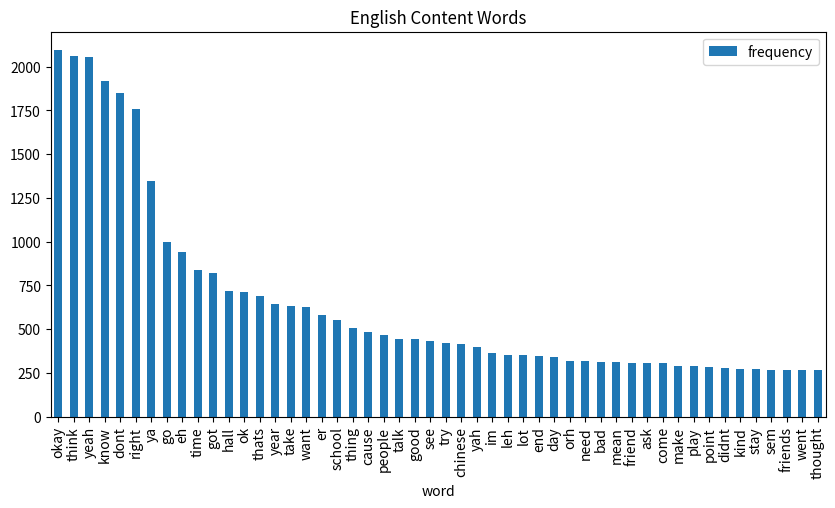

In [ ]:
df_en_content = pd.DataFrame(en_content_word_counter, columns=['word', 'frequency']).head(50)
df_en_content.plot(kind='bar', x='word', figsize = (10, 5), title="English Content Words")

<Axes: title={'center': 'Chinese Content Words'}, xlabel='word'>

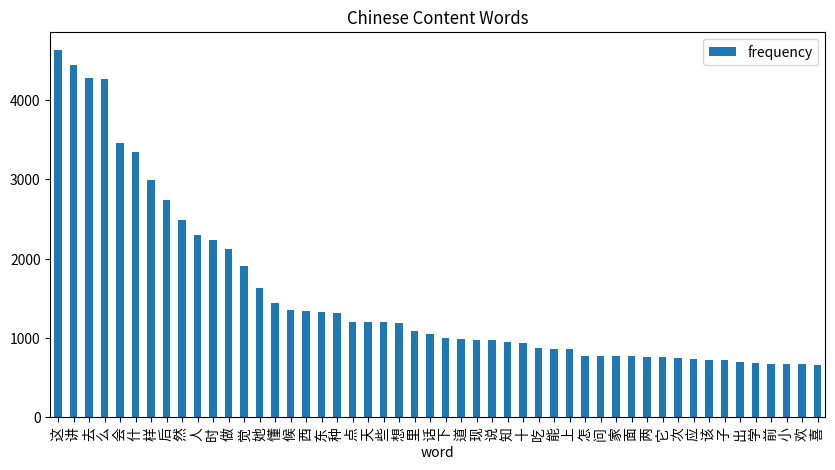

In [ ]:
df_cn_content = pd.DataFrame(cn_content_word_counter, columns=['word', 'frequency'])[5:55]
df_cn_content.plot(kind='bar', x='word', figsize = (10, 5), title="Chinese Content Words")

In [ ]:
!wget -q -O f_all_words.txt "https://drive.google.com/uc?export=download&id=1hjl5Epdyei0G2ZrMCxWm3zE_tJD50W3u" # from Ed
f_all_words = []
with open('f_all_words.txt') as f:
  for line in f:
    for word in line.split():
      f_all_words.append(word)

In [ ]:
f_languages = []
for idx, word in enumerate(f_all_words):
  if re.search("[\u4e00-\u9FFF]", word): # cn
    f_languages.append(0)
  else: # en
    f_languages.append(1)

In [ ]:
f_is_cs = [0]
for i in range(1, len(f_languages)):
  if f_languages[i] != f_languages[i-1]:
    f_is_cs.append(1)
  else:
    f_is_cs.append(0)

In [ ]:
print(sum(f_is_cs) / len(f_is_cs))

0.16669900050642353


In [ ]:
f_all_words_counter = Counter(f_all_words)
f_en_function_word_counter = Counter({k: f_all_words_counter[k] for k in f_all_words_counter.keys() if k in en_function_words}).most_common()
f_cn_function_word_counter = Counter({k: f_all_words_counter[k] for k in f_all_words_counter.keys() if k in cn_function_words}).most_common()
df_f_en_function = pd.DataFrame(f_en_function_word_counter, columns=['word', 'frequency']).head(50)
df_f_cn_function = pd.DataFrame(f_cn_function_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
f_en_content_word_counter = Counter({k: f_all_words_counter[k] for k in f_all_words_counter.keys() if k not in en_function_words and words_languages[k] == 1 and f_all_words_counter[k] > 50}).most_common()
f_cn_content_word_counter = Counter({k: f_all_words_counter[k] for k in f_all_words_counter.keys() if k not in cn_function_words and words_languages[k] == 0 and f_all_words_counter[k] > 50}).most_common()
df_f_en_content = pd.DataFrame(f_en_content_word_counter, columns=['word', 'frequency']).head(50)
df_f_cn_content = pd.DataFrame(f_cn_content_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
!wget -q -O m_all_words.txt "https://drive.google.com/uc?export=download&id=1SVDa66mcuArELeVB_ppocidvlrfpVu62" # from Ed
m_all_words = []
with open('m_all_words.txt') as f:
  for line in f:
    for word in line.split():
      m_all_words.append(word)

In [ ]:
m_languages = []
for idx, word in enumerate(m_all_words):
  if re.search("[\u4e00-\u9FFF]", word): # cn
    m_languages.append(0)
  else: # en
    m_languages.append(1)

In [ ]:
m_is_cs = [0]
for i in range(1, len(m_languages)):
  if m_languages[i] != m_languages[i-1]:
    m_is_cs.append(1)
  else:
    m_is_cs.append(0)

In [ ]:
print(sum(m_is_cs) / len(m_is_cs))

0.16384237642891644


In [ ]:
m_all_words_counter = Counter(m_all_words)
m_en_function_word_counter = Counter({k: m_all_words_counter[k] for k in m_all_words_counter.keys() if k in en_function_words}).most_common()
m_cn_function_word_counter = Counter({k: m_all_words_counter[k] for k in m_all_words_counter.keys() if k in cn_function_words}).most_common()
df_m_en_function = pd.DataFrame(m_en_function_word_counter, columns=['word', 'frequency']).head(50)
df_m_cn_function = pd.DataFrame(m_cn_function_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
m_en_content_word_counter = Counter({k: m_all_words_counter[k] for k in m_all_words_counter.keys() if k not in en_function_words and words_languages[k] == 1 and m_all_words_counter[k] > 50}).most_common()
m_cn_content_word_counter = Counter({k: m_all_words_counter[k] for k in m_all_words_counter.keys() if k not in cn_function_words and words_languages[k] == 0 and m_all_words_counter[k] > 50}).most_common()
df_m_en_content = pd.DataFrame(m_en_content_word_counter, columns=['word', 'frequency']).head(50)
df_m_cn_content = pd.DataFrame(m_cn_content_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
!wget -q -O all_spa.csv "https://drive.google.com/uc?export=download&id=1YhXTGRwOh3xvWLES2NBy3l_6o_14oGPe" # from Ed
spa_df = pd.read_csv('all_spa.csv')
spa_df.drop(columns=['Unnamed: 0'], inplace=True)
print(spa_df)

         word gender language  is_cs
0      cuándo      M      spa      0
1       vamos      M      spa      0
2           a      M      spa      0
3       salir      M      spa      0
4          no      M      spa      0
...       ...    ...      ...    ...
69136   quién      M      spa      0
69137    dijo      M      spa      0
69138     eso      M      spa      0
69139       I      F      eng      1
69140     did      F      eng      0

[69141 rows x 4 columns]


In [ ]:
grouped = spa_df.groupby(['gender'])
print(grouped.get_group('M')['is_cs'].sum() / len(grouped.get_group('M')))
print(grouped.get_group('F')['is_cs'].sum() / len(grouped.get_group('F')))

0.02889376149384637
0.034895387250703534


In [ ]:
all_spa_words = list(spa_df['word'])
all_spa_languages = list(spa_df['language'])
all_spa_cs = list(spa_df['is_cs'])

In [ ]:
sp_function_words = ['el',
                     'la',
                     'un',
                     'una',
                     'me',
                     'te',
                     'lo',
                     'le',
                     'se',
                     'la',
                     'los',
                     'las',
                     'unos',
                     'unas',
                     'nos',
                     'os',
                     'los',
                     'les',
                     'las',
                     'a',
                     'ahí',
                     'alguien',
                     'algun',
                     'allí',
                     'allá',
                     'aquí',
                     'acá',
                     'bastante',
                     'demasiados',
                     'demasiadas',
                     'está',
                     'esto',
                     'mi',
                     'mis',
                     'nadie',
                     'otro',
                     'otra',
                     'otros',
                     'otras',
                     'pocos',
                     'pocas',
                     'que',
                     'qué',
                     'tan',
                     'tanto',
                     'tanta',
                     'tantos',
                     'tantas',
                     'todavía',
                     'todo',
                     'toda',
                     'todos',
                     'y',
                     'como',
                     'pero',
                     'o',
                     'si',
                     'porque',
                     'ni',
                     'pues',
                     'sino',
                     'aunque',
                     'mientras',
                     'luego',
                     'entonces',
                     'después',
                     'ya',
                     'ahora',
                     'además',
                     'todavía', # skip adv
                     'de', # prep
                     'a',
                     'en',
                     'por',
                     'para',
                     'con',
                     'sin',
                     'hasta',
                     'durante',
                     'desde',
                     'contra',
                     'según',
                     'acerca',
                     'pesar',
                     'causa',
                     'entre',
                     'hacia',
                     'alrededor',
                     'junto',
                     'lado',
                     'cerca',
                     'lejos',
                     'sobre',
                     'encima',
                     'debajo',
                     'delante',
                     'detrás',
                     'dentro',
                     'fuera',
                     'través',
                     'más',
                     'muy',
                     'mucho',
                     'poco',
                     'bastante',
                     'demasiado',
                     'tanto',
                     'todo',
                     'todos',
                     'nada',
                     'algo',
                     'montón',
                     'yo',
                     'tú',
                     'él',
                     'ella',
                     'usted',
                     'nosotros',
                     'ellos',
                     'ellas',
                     'ustedes',
                     'alguien',
                     'nadie',
                     'conmigo',
                     'contigo'
]

In [ ]:
# all_spa_words = list(spa_df['word'])
# all_spa_languages = list(spa_df['language'])
# all_spa_cs = list(spa_df['is_cs'])

In [ ]:
sp_words_languages = dict(zip(spa_df.word, spa_df.language))

In [ ]:
m_all_spa_words = list(grouped.get_group('M')['word'])
m_all_spa_words_counter = Counter(m_all_spa_words)
m_spa_en_function_word_counter = Counter({k: m_all_spa_words_counter[k] for k in m_all_spa_words_counter.keys() if k in en_function_words}).most_common()
m_spa_sp_function_word_counter = Counter({k: m_all_spa_words_counter[k] for k in m_all_spa_words_counter.keys() if k in sp_function_words}).most_common()
df_m_spa_en_function = pd.DataFrame(m_spa_en_function_word_counter, columns=['word', 'frequency']).head(50)
df_m_spa_sp_function = pd.DataFrame(m_spa_sp_function_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
m_spa_en_content_word_counter = Counter({k: m_all_spa_words_counter[k] for k in m_all_spa_words_counter.keys() if k not in en_function_words and sp_words_languages[k] == 'eng' and m_all_spa_words_counter[k] > 50}).most_common()
m_spa_sp_content_word_counter = Counter({k: m_all_spa_words_counter[k] for k in m_all_spa_words_counter.keys() if k not in sp_function_words and sp_words_languages[k] == 'spa' and m_all_spa_words_counter[k] > 50}).most_common()
df_m_spa_en_content = pd.DataFrame(m_spa_en_content_word_counter, columns=['word', 'frequency']).head(50)
df_m_spa_sp_content = pd.DataFrame(m_spa_sp_content_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
f_all_spa_words = list(grouped.get_group('F')['word'])
f_all_spa_words_counter = Counter(f_all_spa_words)
f_spa_en_function_word_counter = Counter({k: f_all_spa_words_counter[k] for k in f_all_spa_words_counter.keys() if k in en_function_words}).most_common()
f_spa_sp_function_word_counter = Counter({k: f_all_spa_words_counter[k] for k in f_all_spa_words_counter.keys() if k in sp_function_words}).most_common()
df_f_spa_en_function = pd.DataFrame(f_spa_en_function_word_counter, columns=['word', 'frequency']).head(50)
df_f_spa_sp_function = pd.DataFrame(f_spa_sp_function_word_counter, columns=['word', 'frequency']).head(50)

f_spa_en_content_word_counter = Counter({k: f_all_spa_words_counter[k] for k in f_all_spa_words_counter.keys() if k not in en_function_words and sp_words_languages[k] == 'eng' and f_all_spa_words_counter[k] > 50}).most_common()
f_spa_sp_content_word_counter = Counter({k: f_all_spa_words_counter[k] for k in f_all_spa_words_counter.keys() if k not in sp_function_words and sp_words_languages[k] == 'spa' and f_all_spa_words_counter[k] > 50}).most_common()
df_f_spa_en_content = pd.DataFrame(f_spa_en_content_word_counter, columns=['word', 'frequency']).head(50)
df_f_spa_sp_content = pd.DataFrame(f_spa_sp_content_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
all_spa_words_counter = Counter(all_spa_words)
spa_en_function_word_counter = Counter({k: all_spa_words_counter[k] for k in all_spa_words_counter.keys() if k in en_function_words}).most_common()
spa_sp_function_word_counter = Counter({k: all_spa_words_counter[k] for k in all_spa_words_counter.keys() if k in sp_function_words}).most_common()
df_spa_en_function = pd.DataFrame(spa_en_function_word_counter, columns=['word', 'frequency']).head(50)
df_spa_sp_function = pd.DataFrame(spa_sp_function_word_counter, columns=['word', 'frequency']).head(50)

spa_en_content_word_counter = Counter({k: all_spa_words_counter[k] for k in all_spa_words_counter.keys() if k not in en_function_words and sp_words_languages[k] == 'eng' and all_spa_words_counter[k] > 50}).most_common()
spa_sp_content_word_counter = Counter({k: all_spa_words_counter[k] for k in all_spa_words_counter.keys() if k not in sp_function_words and sp_words_languages[k] == 'spa' and all_spa_words_counter[k] > 50}).most_common()
df_spa_en_content = pd.DataFrame(spa_en_content_word_counter, columns=['word', 'frequency']).head(50)
df_spa_sp_content = pd.DataFrame(spa_sp_content_word_counter, columns=['word', 'frequency']).head(50)

In [ ]:
all_dists = [zipfian_dist, list(df_en_function['frequency']), list(df_en_content['frequency']), list(df_cn_function['frequency']), list(df_cn_content['frequency']),
             list(df_f_cn_function['frequency']), list(df_f_cn_content['frequency']), list(df_m_cn_function['frequency']), list(df_m_cn_content['frequency']),
             list(df_f_en_function['frequency']), list(df_f_en_content['frequency']), list(df_m_en_function['frequency']), list(df_m_en_content['frequency']),
             list(df_spa_en_function['frequency']), list(df_spa_en_content['frequency']), list(df_spa_sp_function['frequency']), list(df_spa_sp_content['frequency']),
             list(df_m_spa_en_function['frequency']), list(df_m_spa_en_content['frequency']), list(df_m_spa_sp_function['frequency']), list(df_m_spa_sp_content['frequency']),
             list(df_f_spa_en_function['frequency']), list(df_f_spa_en_content['frequency']), list(df_f_spa_sp_function['frequency']), list(df_f_spa_sp_content['frequency']),
             ]
all_names = ['zipf', 'en func seame', 'en cont seame', 'cn func', 'cn cont',
             'f cn func', 'f cn cont', 'm cn func', 'm cn cont',
             'f en func seame', 'f en cont seame', 'm en func seame', 'm en cont seame',
             'en func miami', 'en cont miami', 'spa func', 'spa cont',
             'm en func miami', 'm en cont miami', 'm spa func', 'm spa cont',
             'f en func miami', 'f en cont miami', 'f spa func', 'f spa cont',
             ]
all_divs = {}
for i in range(len(all_dists)):
  for j in range(len(all_dists)):
    if i != j:
      pair = all_names[i] + " and " + all_names[j]
      print(pair)
      kl = kl_divergence(normalize(all_dists[i]), normalize(all_dists[j]))
      print(kl)
      all_divs[pair] = kl
      print()         


zipf and en func seame
0.10093214036964529

zipf and en cont seame
0.17072462265033503

zipf and cn func
0.08131792248825881

zipf and cn cont
0.1949273941340866

zipf and f cn func
0.08362406107632701

zipf and f cn cont
0.03504506131373789

zipf and m cn func
0.07788649688656442

zipf and m cn cont
0.034024734602137764

zipf and f en func seame
0.07022238505320859

zipf and f en cont seame
0.16378309402207633

zipf and m en func seame
0.13414794087607643

zipf and m en cont seame
0.14411369855683112

zipf and en func miami
0.17344052179363897

zipf and en cont miami
0.014040287501265384

zipf and spa func
0.08096012583519692

zipf and spa cont
0.02982578641245978

zipf and m en func miami
0.1067430841676029

zipf and m en cont miami
0.07983123644079781

zipf and m spa func
0.10093270260209453

zipf and m spa cont
0.04923068648729209

zipf and f en func miami
0.17377295755423955

zipf and f en cont miami
0.037931518227144564

zipf and f spa func
0.06494366951876741

zipf and f spa con

In [ ]:
print(all_divs['m spa func and f spa func'])

0.01223419862640482


<Axes: title={'center': 'Spanish Content Words'}, xlabel='word'>

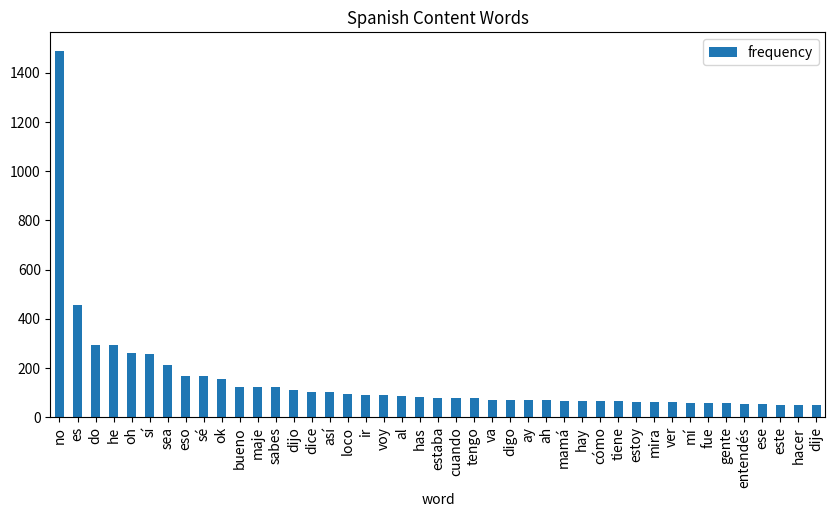

In [ ]:
df_spa_sp_content.plot(kind='bar', x='word', figsize = (10, 5), title="Spanish Content Words")

<Axes: title={'center': 'Spanish Function Words'}, xlabel='word'>

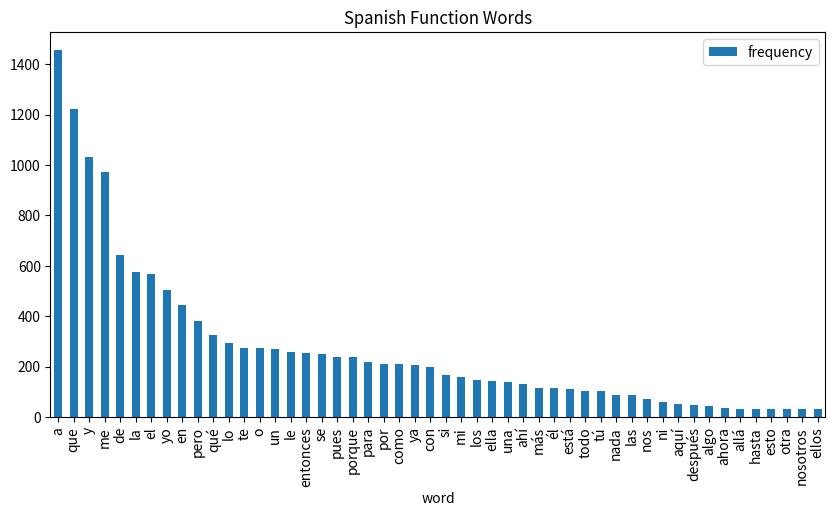

In [ ]:
df_spa_sp_function.plot(kind='bar', x='word', figsize = (10, 5), title="Spanish Function Words")

<Axes: title={'center': 'English Content Words'}, xlabel='word'>

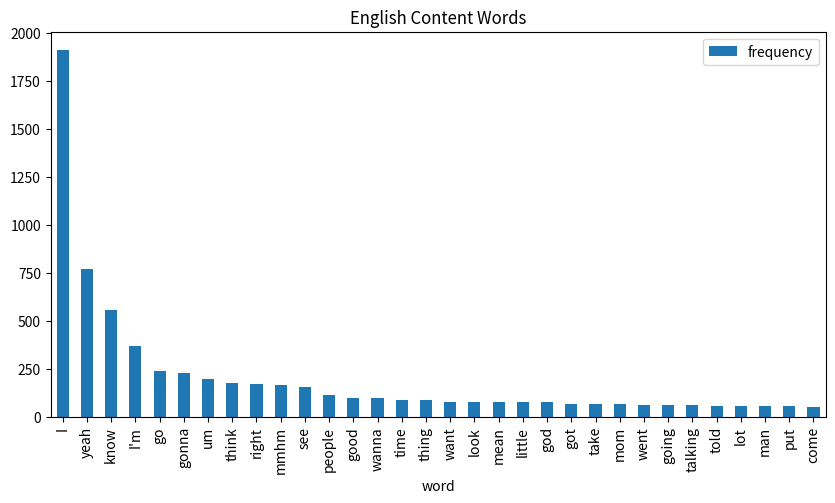

In [ ]:
df_spa_en_content.plot(kind='bar', x='word', figsize = (10, 5), title="English Content Words")

<Axes: title={'center': 'English Function Words'}, xlabel='word'>

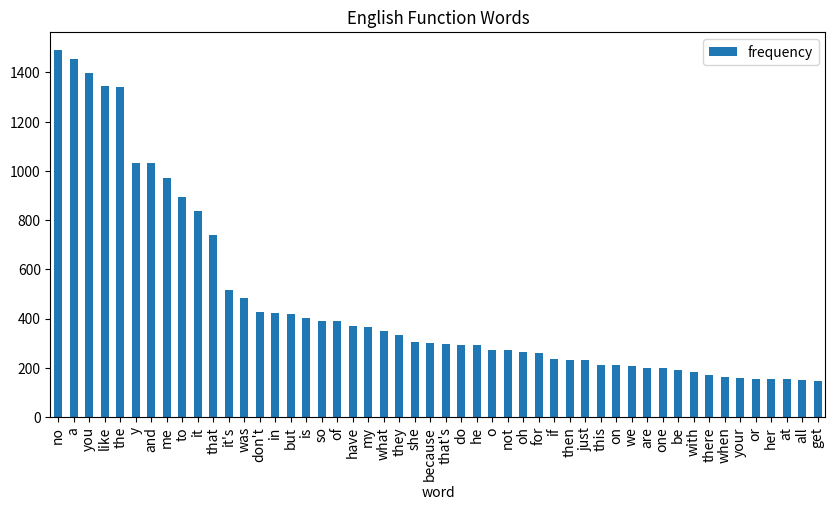

In [ ]:
df_spa_en_function.plot(kind='bar', x='word', figsize = (10, 5), title="English Function Words")

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

roberta_en_mlm = pipeline("fill-mask", model='roberta-base')


In [ ]:
roberta_cn_mlm = pipeline('fill-mask', model='uer/chinese_roberta_L-8_H-512')

In [ ]:
import random

In [ ]:
correct_predictions = 0
correct_languages = 0
all_predictions = 0
for i in range(0, 1400, 14):
  all_predictions += 1
  masked_idx = random.randrange(0, 15) + i
  # print(' '.join(all_words[i:i+15]))
  correct_language = languages[masked_idx]
  correct_languages += correct_language
  # print(correct_language)
  current_utterance = ' '.join(all_words[i:masked_idx]) + " " + f"{roberta_en_mlm.tokenizer.mask_token}" + " " + ' '.join(all_words[masked_idx+1:i+10])
  # print(current_utterance)
  predicted_words = [predict_dict['token_str'] for predict_dict in roberta_en_mlm(current_utterance) if re.search('[a-zA-Z]+|[\u4e00-\u9FFF]+', predict_dict['token_str'])]
  if len(predicted_words) > 0: # if all predictions aren't punctuation
    predicted_word = roberta_en_mlm(current_utterance)[0]['token_str']
    #print(predicted_word)
    if re.search("[\u4e00-\u9FFF]", predicted_word):
      predicted_language = 0
    elif re.search("[a-zA-Z]", predicted_word):
      predicted_language = 1
    else:
      predicted_language = -1 # punctuation?
    if predicted_language == correct_language:
      correct_predictions += 1
print(correct_predictions)
print(correct_languages)

In [ ]:
correct_predictions = 0
correct_languages = 0
all_predictions = 0
for i in range(0, 1400, 14):
  all_predictions += 1
  masked_idx = random.randrange(0, 10) + i
  #print(' '.join(all_words[i:i+10]))
  correct_language = languages[masked_idx]
  correct_languages += correct_language
  # print(correct_language)
  current_utterance = ' '.join(all_words[i:masked_idx]) + " " + f"{roberta_cn_mlm.tokenizer.mask_token}" + " " + ' '.join(all_words[masked_idx+1:i+10])
  #print(current_utterance)
  predicted_words = [predict_dict['token_str'] for predict_dict in roberta_cn_mlm(current_utterance) if re.search('[a-zA-Z]+|[\u4e00-\u9FFF]+', predict_dict['token_str'])]
  if len(predicted_words) > 0: # if all predictions aren't punctuation
    predicted_word = roberta_cn_mlm(current_utterance)[0]['token_str']
    #print(predicted_word)
    if re.search("[\u4e00-\u9FFF]", predicted_word):
      predicted_language = 0
    elif re.search("[a-zA-Z]", predicted_word):
      predicted_language = 1
    else:
      predicted_language = -1 # punctuation?
    if predicted_language == correct_language:
      correct_predictions += 1
print(correct_predictions)
print(correct_languages)

In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-multilingual-uncased')

In [ ]:
correct_predictions = 0
correct_languages = 0
all_predictions = 0
for i in range(0, 1400, 14):
  all_predictions += 1
  masked_idx = random.randrange(0, 10) + i
  #print(' '.join(all_words[i:i+10]))
  correct_language = languages[masked_idx]
  correct_languages += correct_language
  # print(correct_language)
  current_utterance = ' '.join(all_words[i:masked_idx]) + " " + f"{unmasker.tokenizer.mask_token}" + " " + ' '.join(all_words[masked_idx+1:i+10])
  #print(current_utterance)
  predicted_words = [predict_dict['token_str'] for predict_dict in unmasker(current_utterance) if re.search('[a-zA-Z]+|[\u4e00-\u9FFF]+', predict_dict['token_str'])]
  if len(predicted_words) > 0: # if all predictions aren't punctuation
    predicted_word = unmasker(current_utterance)[0]['token_str']
    #print(predicted_word)
    if re.search("[\u4e00-\u9FFF]", predicted_word):
      predicted_language = 0
    elif re.search("[a-zA-Z]", predicted_word):
      predicted_language = 1
    else:
      predicted_language = -1 # punctuation?
    if predicted_language == correct_language:
      correct_predictions += 1
print(correct_predictions)
print(correct_languages)

In [ ]:
roberta_unmasker = pipeline('fill-mask', model='xlm-roberta-large')

In [ ]:
correct_predictions = 0
correct_languages = 0
all_predictions = 0
for i in range(0, 1400, 14):
  all_predictions += 1
  masked_idx = random.randrange(0, 10) + i
  #print(' '.join(all_words[i:i+10]))
  correct_language = languages[masked_idx]
  correct_languages += correct_language
  # print(correct_language)
  current_utterance = ' '.join(all_words[i:masked_idx]) + " " + f"{roberta_unmasker.tokenizer.mask_token}" + " " + ' '.join(all_words[masked_idx+1:i+10])
  #print(current_utterance)
  predicted_words = [predict_dict['token_str'] for predict_dict in roberta_unmasker(current_utterance) if re.search('[a-zA-Z]+|[\u4e00-\u9FFF]+', predict_dict['token_str'])]
  if len(predicted_words) > 0: # if all predictions aren't punctuation
    predicted_word = roberta_unmasker(current_utterance)[0]['token_str']
    #print(predicted_word)
    if re.search("[\u4e00-\u9FFF]", predicted_word):
      predicted_language = 0
    elif re.search("[a-zA-Z]", predicted_word):
      predicted_language = 1
    else:
      predicted_language = -1 # punctuation?
    if predicted_language == correct_language:
      correct_predictions += 1
print(correct_predictions)
print(correct_languages)